In [10]:
import pickle, os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from urllib.request import urlopen 
import numpy as np

def load_data():

    url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/'

    ######### LOAD DATA
    # The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
    data_file_name = "Ising2DFM_reSample_L40_T=4.00.pkl" 
    # The labels are obtained from the following file:
    label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"
    #DATA
    data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
    print('size from dataset', data.shape)
    data = np.unpackbits(data).reshape(-1, 40, 40) # before -1,1600 Decompress array and reshape for convenience
    #print(data, data.shape, data.dtype)
    data=data.astype('int')
    #print(data, data.shape)
    data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
    #print(data, data.shape, data.dtype)
    #LABELS (convention is 1 for ordered states and 0 for disordered states)
    #labels = pickle.load(urlopen(url_main + label_file_name)) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
    print("Finished loading data. "+"Data size {}".format(data.shape))
    return data

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

data = load_data()
#X_train, X_test, Y_train, Y_test = train_test_split(data, test_size=0.2)
#model = models.Sequential()
#model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(40, 40, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.summary()
#model.add(layers.Flatten())
#model.add(layers.Dense(100, activation='softmax'))
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
#
#history = model.fit(X_train, Y_train, epochs=10, 
#                    validation_data=(X_test, Y_test))
#



size from dataset (2000000,)
Finished loading data. Data size (10000, 40, 40)


MovieWriter imagemagick unavailable; using Pillow instead.


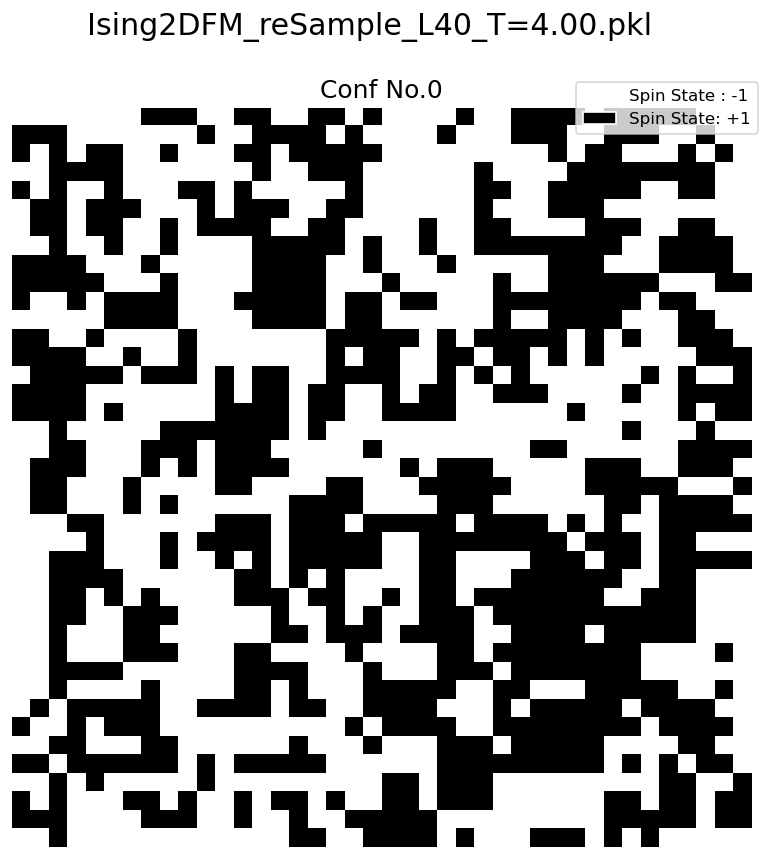

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.animation import FuncAnimation

#colors = ['dodgerblue', 'crimson']
colors = ['white', 'black']
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi = 120)
legend_elements = [Patch(facecolor=color, edgecolor='w') for color in colors]
line = ax.imshow(data[0,:].reshape(40,40), cmap=LinearSegmentedColormap.from_list('', colors))
#im = plt.imshow(data[9999, :].reshape(40, 40), animated=True)
def update(i):
    line.set_data(data[i,:].reshape(40,40))
    ax.set_title('Conf No.'+str(i), fontsize = 15)
    ax.set_axis_off()
plt.suptitle(data_file_name, fontsize = 18)
anim = FuncAnimation(fig, update, frames=40, interval=50)
ax.legend(handles=legend_elements,
          labels=[f"Spin State : -1", f"Spin State: +1"],
          loc="right", bbox_to_anchor=[1.02, 1])
anim.save('ising.gif', writer='imagemagick')


In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape

170498071/170498071 [==============================] - 32s 0us/step


(50000, 32, 32, 3)

In [7]:
data.shape

(10000, 1600)